<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#fff;" align="center">Implement a scoring model - P7</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">| Notebook optimization |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and files</h2>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries</h3>
</div>

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer

## Own specific functions 
from functions import *

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Files</h3>
</div>

In [26]:
df = pd.read_csv(r"datasets\df_processed.csv")
df = df.drop(columns=["index"])

In [27]:
df_analysis(df, "df", analysis_type="header")


Analysis Header of df dataset
--------------------------------------------------------------------------------
- Dataset shape:			 356251 rows and 797 columns
- Total of NaN values:			 72099981
- Percentage of NaN:			 25.39 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 2.1 GB


In [28]:
df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.select_dtypes(include=['object']).columns.tolist()

[]

<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li><b>Missing values</b> - There are 25.39% of missing-values to treat</li>
        <li><b>Columns type</b> - All columns are numerics</li>
    </ul> 
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Class Imbalance</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to analyze in details, whether ours target has an imbalanced class
   </p>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Verifying</h3>
</div>

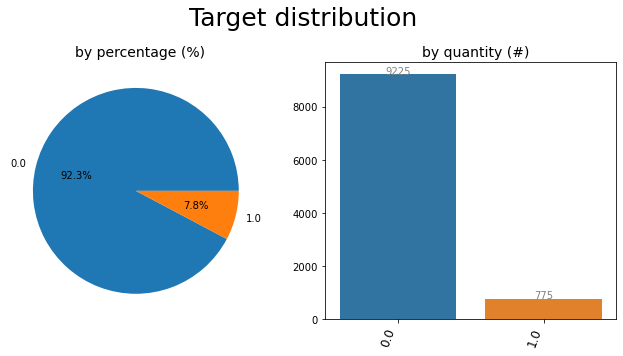

In [4]:
barplot_and_pie(df["TARGET"], "Target distribution", " ")

<div class="alert alert-block alert-warning">
    <p>Here we can see how much the dataset is imbalanced</p>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Missing-values</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Before treating the class imbalance in the target, it is necessary to treat the missing-values in all the dataset, to do that, we are going to fill values with SimpleImputer
   </p>
</div>

In [14]:
df_notnull = df.drop(columns=["TARGET"])

In [17]:
impute = SimpleImputer(missing_values=np.nan, strategy="mean")
impute(df_notnull)

TypeError: 'SimpleImputer' object is not callable

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.2. Smote</h3>
</div>

<div class="alert alert-block alert-info">
    <p>To treat the Imbalanced class, we are going to use a type of data augmentation for the minority class where new examples can be synthesized from the existing examples and it is referred as the Synthetic Minority Oversampling Technique - SMOTE.</p>
</div>

In [ ]:
train_df = df[df["TARGET"].notnull()]
test_df = df[df["TARGET"].isnull()]

<div class="alert alert-block alert-danger">
    <h2>FLAG</h2>
</div>

In [ ]:
df_analysis(test_df, "df", analysis_type="header")

In [ ]:
df_analysis(df, "test_df", analysis_type="summarized")

In [ ]:
X = train_df.drop(columns=["TARGET"])

In [ ]:
y = train_df.loc[:,"TARGET"]

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter

In [ ]:
counter = Counter(y)
print(counter)

In [ ]:
# Oversampling using smote on X_tr_enc 

from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy="auto", k_neighbors=5, 
              n_jobs=-1, random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
xx

In [ ]:
del df
gc.collect()